# Fit $D^0 \to K^0_Sπ^+π^-$ with TFA2 (Belle model)

We will fit 

$$
D^0 \to K^0_S \pi^+\pi^-
$$

decays generated with the Belle resonance model using Jordi's toys:

| Resonance | Amplitude | Phase (deg) | Fit fraction | ID |
|-----------|-----------|-------------|--------------|----|
| $K^*(892)^-$ | 1.590 ± 0.003 | 131.8 ± 0.2 | 0.6045 | 2 |
| $K_0^*(1430)^-$ | 2.059 ± 0.010 | −194.6 ± 1.7 | 0.0702 | 3 |
| $K_2^*(1430)^-$ | 1.150 ± 0.009 | −41.5 ± 0.4 | 0.0221 | 4 |
| $K^*(1410)^-$ | 0.496 ± 0.011 | 83.4 ± 0.9 | 0.0026 | 5 |
| $K^*(1680)^-$ | 1.556 ± 0.097 | −83.2 ± 1.2 | 0.0016 | 6 |
| $K^*(892)^+$ | 0.139 ± 0.002 | −42.1 ± 0.7 | 0.0046 | 7 |
| $K_0^*(1430)^+$ | 0.176 ± 0.007 | −102.3 ± 2.1 | 0.0005 | 8 |
| $K_2^*(1430)^+$ | 0.077 ± 0.007 | −32.2 ± 4.7 | 0.0001 | 9 |
| $K^*(1410)^+$ | 0.248 ± 0.010 | −145.7 ± 2.9 | 0.0007 | 10 |
| $K^*(1680)^+$ | 1.407 ± 0.053 | 86.1 ± 2.7 | 0.0013 | 11 |
| $\rho(770)$ | 1.0 (fixed) | 0.0 (fixed) | 0.2000 | 1 |
| $\omega(782)$ | 0.0370 ± 0.0004 | 114.9 ± 0.6 | 0.0057 | 12 |
| $f_2(1270)$ | 1.300 ± 0.013 | −31.6 ± 0.5 | 0.0141 | 13 |
| $\rho(1450)$ | 0.532 ± 0.027 | 80.8 ± 2.1 | 0.0012 | 14 |
| ππ S wave | - | - | 0.1288 | 15 |

The $\pi\pi$ S-wave is parameterized with the following parameters:

| Parameter | Amplitude | Phase (deg) |
|-----------|-----------|-------------|
| $\beta_1$ | 4.23 ± 0.02 | 164.0 ± 0.2 |
| $\beta_2$ | 10.90 ± 0.02 | 15.6 ± 0.2 |
| $\beta_3$ | 37.4 ± 0.3 | 3.3 ± 0.4 |
| $\beta_4$ | 14.7 ± 0.1 | −8.9 ± 0.3 |
| $f^{prod}_{11}$ | 12.76 ± 0.05 | −161.1 ± 0.3 |
| $f^{prod}_{12}$ | 14.2 ± 0.2 | −176.2 ± 0.6 |
| $f^{prod}_{13}$ | 10.0 ± 0.5 | −124.7 ± 2.1 |

The $K\pi$ S-wave is parametrized with the following parameters:

| Parameter | Value |
|-----------|-------|
| M ($MeV/c^2$) | 1461.7 ± 0.8 |
| Γ ($MeV/c^2$) | 268.3 ± 1.1 |
| F | 0.4524 ± 0.005 |
| $\phi_F$ (rad) | 0.248 ± 0.003 |
| R | 1.0 (fixed) |
| $\phi_R$ (rad) | 2.495 ± 0.009 |
| $a$ ($GeV/c^2$) | 0.172 ± 0.006 |
| $r$ ($GeV/c^2$) | −20.6 ± 0.3 |

The $K^*(892)$ is parametrized with the following parameters:

| Parameter | Value |
|-----------|-------|
| M ($MeV/c^2$) | 892.68 ± 0.04 |
| Γ ($MeV/c^2$) | 47.49 ± 0.06 |

## Paper description of the model

The Dalitz amplitudes $\mathcal{A}_f$ and $\bar{\mathcal{A}}_f$ are expressed as a sum of quasi-two-body amplitudes. For the P- and D-wave decays, we include 12 intermediate resonances described by relativistic Breit-Wigner parametrizations with massdependent widths, Blatt-Weisskopf penetration factors as form factors, and Zemach tensors for the angular dependence [19]. For the ππ S-wave dynamics, we adopt the K-matrix formalism with P-vector approximation [20].For the K0Sπ S wave, we follow the same description as in Ref. [14]

Import modules

In [1]:
# Import AmpliTF modules
import amplitf.interface as atfi
import amplitf.kinematics as atfk
import amplitf.dynamics as atfd
import amplitf.likelihood as atfl
from amplitf.phasespace.dalitz_phasespace import DalitzPhaseSpace

# Import TFA modules
import tfa.toymc as tft
import tfa.plotting as tfp
import tfa.optimisation as tfo
import tfa.rootio as tfr

2025-05-19 16:37:13.910436: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-05-19 16:37:13.910463: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-05-19 16:37:13.910468: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2025-05-19 16:37:13.910483: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-19 16:37:13.910493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Set the number of events to generate and the number of normalisation point to calculate the integral of the likelihood

In [2]:
nfit = 100000  # Number of points to fit
ntoys = 100000  # Number of toys to generate
nnorm = 1000000  # Number of normalisation points

Now define some constants

In [3]:
# Masses of final state particles
from particle.particle import literals as lp
# Dalitz Particles
mkz = atfi.const(lp.K_S_0.mass/1000)
mpi = atfi.const(lp.pi_plus.mass/1000)
md = atfi.const(lp.D_0.mass/1000)

# Resonances
mkst = atfi.const(0.89268)#atfi.const(lp.Kst_892_0.mass/1000)
wkst = atfi.const(0.04749)#atfi.const(lp.Kst_892_0.width/1000)
mrho = atfi.const(lp.rho_770_0.mass/1000)
wrho = atfi.const(lp.rho_770_0.width/1000)
mk0st1430 = atfi.const(lp.K_0st_1430_plus.mass/1000)
wk0st1430 = atfi.const(lp.K_0st_1430_plus.width/1000)
mk2st1430 = atfi.const(lp.K_2st_1430_plus.mass/1000)
wk2st1430 = atfi.const(lp.K_2st_1430_plus.width/1000)
mkst1410 = atfi.const(lp.Kst_1410_plus.mass/1000)
wkst1410 = atfi.const(lp.Kst_1410_plus.width/1000)
mkst1680 = atfi.const(lp.Kst_1680_plus.mass/1000)
wkst1680 = atfi.const(lp.Kst_1680_plus.width/1000)
momega = atfi.const(lp.omega_782.mass/1000)
womega = atfi.const(lp.omega_782.width/1000)
mf2_1270 = atfi.const(lp.f_2_1270.mass/1000)
wf2_1270 = atfi.const(lp.f_2_1270.width/1000)
mrho1450 = atfi.const(lp.rho_1450_0.mass/1000)
wrho1450 = atfi.const(lp.rho_1450_0.width / 1000)

# LASS
lass_M = atfi.const(1.4617)
lass_G = atfi.const(0.2683)
lass_F = atfi.const(0.4524)
lass_phiF = atfi.const(0.248)
lass_R = atfi.const(1.0)
lass_phiR = atfi.const(2.495)
lass_a = atfi.const(0.172)
lass_r = atfi.const(-20.6)

# Blatt-Weisskopf radii for Breit-Wigner lineshape
rd = atfi.const(5.0)
rr = atfi.const(1.5)

# K matrix model parameters
meta = atfi.const(lp.eta.mass/1000.)
metap = atfi.const(lp.etap_958.mass/1000.)
g_poles = atfi.const( [ [0.22889, -0.55377, 0, -0.39899, -0.34639],
                        [0.94128, 0.55095, 0, 0.39065, 0.31503],
                        [0.36856, 0.23888, 0.55639, 0.18340, 0.18681],
                        [0.33650, 0.40907, 0.85679, 0.19906, -0.00984],
                        [0.18171, -0.17558, -0.79658, -0.00355, 0.22358]] )
m_poles = atfi.const( [0.651, 1.2036, 1.55817, 1.21, 1.82206] )
b_poles = atfi.complex( atfi.const([3.122415682166643, 11.139907856904129, 29.146102368470210,6.631556203215280,0.0]),
                        atfi.const([7.928823290976309,4.948420661321371,-0.053588781806890,-8.455370251307063,0.0]) )
fprod1 = atfi.complex( atfi.const([-4.724094278696236,-23.289333360304212,-1.860311896516422,-13.638752211193912,0.0]),
                       atfi.const([-6.511009103363590,-12.215597571354197,-32.982507366353126,-22.339804683783186,0.0]) )
fij = atfi.const([ [  0.23399,  0.15044, -0.20545,  0.32825,  0.35412],
                   [  0.15044, 0, 0, 0, 0],
                   [ -0.20545, 0, 0, 0, 0],
                   [  0.32825, 0, 0, 0, 0],
                   [  0.35412, 0, 0, 0, 0]])
s0=atfi.const(-3.92637)
K_matrix_sprod = atfi.const(-0.070000000000000)

and a class to deal with three-body Dalitz phase-space

In [4]:
phsp = DalitzPhaseSpace(mpi, mkz, mpi, md)

## Model
Below there is a function to define the model, allowing to switch on and off specific components.

In [5]:
def resonant_lass_lineshape(m2ab,
                            m0,
                            gamma0,
                            ma,
                            mb):
    r"""LASS line shape, resonant part

    .. math::

        LASS(m^2) = BW(m^2) (\cos \delta_b + i \sin \delta_b ) ( m_0^2 \Gamma_0 / q_0 )

    Args:
        m2ab (float): invariant mass squared of the system
        m0 (float): resonance mass
        gamma0 (float): resonance width
        a (float): parameter *a* of the effective range term
        r (float): parameter *r* of the effective range term
        md (float): mass of mother particle 
        mc (float): mass of other particle wrt resonance

    Returns:
        complex: the resonant LASS amplitude
    """
    m = atfi.sqrt(m2ab)
    q = atfk.two_body_momentum(m, ma, mb)
    q0 = atfk.two_body_momentum(m0, ma, mb)
    width = gamma0 * q / m * m0 / q0
    ampl = (atfd.relativistic_breit_wigner(m2ab, m0, width) *
            atfi.cast_complex(m0 * m0 * gamma0 / q0))
    return ampl

def nonresonant_lass_lineshape(m2ab, a, r, ma, mb):
    r"""LASS line shape, nonresonant part

    .. math::

        LASS(m^2) = \frac{m}{q \cot \delta_b - i q}

    
    with :math:`q` is the momentum of the two-body system and :math:`\delta_b` is the scattering phase shift

    .. math::

        \cot \delta_b = \frac{1}{a q} + \frac{1}{2} r q


    from `Aston et al. Nuclear Physics B, Volume 296, Issue 3 (1988), Pages 493-526 <https://doi.org/10.1016/0550-3213(88)90028-4>`_

    Args:
        m2ab (float): invariant mass squared of the system
        a (float): parameter of the effective range term
        r (float): parameter of the effective range term
        ma (float): mass of particle a
        mb (float): mass of particle b

    Returns:
        complex: the nonresonant LASS amplitude
    """
    m = atfi.sqrt(m2ab)
    q = atfk.two_body_momentum(m, ma, mb)
    # q = atfk.two_body_momentum(m, ma, mb)
    cot_deltab = 1.0 / a / q + 1.0 / 2.0 * r * q
    ampl = atfi.cast_complex(m) / atfi.complex(q * cot_deltab, -q)
    return ampl

def LASS(m2, a, r, m0, gamma0, ma, mb, amp_res, phase_res, amp_nr, phase_nr):
    m = atfi.sqrt(m2)
    #q0 = atfk.two_body_momentum(md, m0, mc)
    q = atfk.two_body_momentum(m, ma, mb)
    cot_delta_beta = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    #delta_beta = atfi.atan(1.0 / cot_delta_beta)
    nr = nonresonant_lass_lineshape(m2, a, r, ma, mb)
    res= resonant_lass_lineshape(m2, m0, gamma0, ma, mb)
    lass = atfi.cast_complex(amp_res) * \
        atfi.complex( atfi.cos(phase_res + 2.0*phase_nr), atfi.sin(phase_res + 2.0*phase_nr) ) * \
             atfi.complex( q * cot_delta_beta, q ) / atfi.complex( q * cot_delta_beta, -q ) * res
    lass += atfi.cast_complex(amp_nr) * atfi.complex( atfi.cos(phase_nr), atfi.sin(phase_nr) ) * \
           atfi.cast_complex( atfi.cos(phase_nr) + atfi.sin(phase_nr) * cot_delta_beta ) * nr
    return lass

In [19]:
fit_switches = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
def model(x):

    m2ab = phsp.m2ab(x)
    m2bc = phsp.m2bc(x)
    m2ac = phsp.m2ac(x)

    # zemach tensors
    # zem_s0 = atfk.zemach_tensor(m2ab, m2ac, m2bc, md, mpi, mkz, mpi, 0)
    # zem_s1 = atfk.zemach_tensor(m2ab, m2ac, m2bc, md, mpi, mkz, mpi, 1)
    # zem_s2 = atfk.zemach_tensor(m2ab, m2ac, m2bc, md, mpi, mkz, mpi, 2)

    coshel_ab = phsp.cos_helicity_ab(x)
    coshel_bc = phsp.cos_helicity_bc(x)
    coshel_ac = phsp.cos_helicity_ac(x)

    hel_ab_0 = atfd.helicity_amplitude(coshel_ab, 0)
    hel_bc_0 = atfd.helicity_amplitude(coshel_bc, 0)
    # hel_ac_0 = atfd.helicity_amplitude(coshel_ac, 0)
    hel_ab_1 = atfd.helicity_amplitude(coshel_ab, 1)
    hel_bc_1 = atfd.helicity_amplitude(coshel_bc, 1)
    hel_ac_1 = atfd.helicity_amplitude(coshel_ac, 1)
    hel_ab_2 = atfd.helicity_amplitude(coshel_ab, 2)
    hel_bc_2 = atfd.helicity_amplitude(coshel_bc, 2)
    hel_ac_2 = atfd.helicity_amplitude(coshel_ac, 2)

    bw1 = atfd.breit_wigner_lineshape(m2ac, mrho, wrho, mpi, mpi, mkz, md, rd,
                                      rr, 1, 1)
    bw2 = atfd.breit_wigner_lineshape(m2ab, mkst, wkst, mpi, mkz, mpi, md, rd,
                                      rr, 1, 1)
    bw3 = atfd.breit_wigner_lineshape(m2ab, mk0st1430, wk0st1430, mpi, mkz,
                                      mpi, md, rd, rr, 0, 0)
    bw4 = atfd.breit_wigner_lineshape(m2ab, mk2st1430, wk2st1430, mpi, mkz,
                                      mpi, md, rd, rr, 1, 1)
    bw5 = atfd.breit_wigner_lineshape(m2ab, mkst1410, wkst1410, mpi, mkz, mpi,
                                      md, rd, rr, 1, 1)
    bw6 = atfd.breit_wigner_lineshape(m2ab, mkst1680, wkst1680, mpi, mkz, mpi,
                                      md, rd, rr, 1, 1)
    bw7 = atfd.breit_wigner_lineshape(m2bc, mkst, wkst, mpi, mkz, mpi, md, rd,
                                      rr, 1, 1)
    bw8 = atfd.breit_wigner_lineshape(m2bc, mk0st1430, wk0st1430, mpi, mkz,
                                      mpi, md, rd, rr, 0, 0)
    bw9 = atfd.breit_wigner_lineshape(m2bc, mk2st1430, wk2st1430, mpi, mkz,
                                      mpi, md, rd, rr, 2, 2)
    bw10 = atfd.breit_wigner_lineshape(m2bc, mkst1410, wkst1410, mpi, mkz, mpi,
                                       md, rd, rr, 1, 1)
    bw11 = atfd.breit_wigner_lineshape(m2bc, mkst1680, wkst1680, mpi, mkz, mpi,
                                       md, rd, rr, 1, 1)
    bw12 = atfd.breit_wigner_lineshape(m2ac, momega, womega, mpi, mpi, mkz, md,
                                       rd, rr, 1, 1)
    bw13 = atfd.breit_wigner_lineshape(m2ac, mf2_1270, wf2_1270, mpi, mpi, mkz,
                                       md, rd, rr, 2, 2)
    bw14 = atfd.breit_wigner_lineshape(m2ac,
                                       mrho1450,
                                       wrho1450,
                                       mpi,
                                       mpi,
                                       mkz,
                                       md,
                                       rd,
                                       rr,
                                       1,
                                       1,
                                       md0=mrho1450 + mkz)

    # LASS
    lass_n = LASS(m2ab, lass_a, lass_r, lass_M, lass_G, mkz, mpi, lass_R, lass_phiR, lass_F, lass_phiF)
    lass_p = LASS(m2bc, lass_a, lass_r, lass_M, lass_G, mkz, mpi, lass_R, lass_phiR, lass_F, lass_phiF)

    # K matrix
    km = atfd.kmatrix_lineshape(
        m2ac, m_poles, g_poles, s0, fij, b_poles, K_matrix_sprod, fprod1,
        [[mpi,mpi], [mkz, mkz], [mpi], [meta, meta], [meta, metap]])

    def _model(a1r,
               a1i,
               a2r,
               a2i,
               a3r,
               a3i,
               a4r,
               a4i,
               a5r,
               a5i,
               a6r,
               a6i,
               a7r,
               a7i,
               a8r,
               a8i,
               a9r,
               a9i,
               a10r,
               a10i,
               a11r,
               a11i,
               a12r,
               a12i,
               a13r,
               a13i,
               a14r,
               a14i,
               a15r,
               a15i,
               #switches=16 * [1]
               switches=fit_switches
               #switches=[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
               ):

        a1 = atfi.complex(a1r, a1i)
        a2 = atfi.complex(a2r, a2i)
        a3 = atfi.complex(a3r, a3i)
        a4 = atfi.complex(a4r, a4i)
        a5 = atfi.complex(a5r, a5i)
        a6 = atfi.complex(a6r, a6i)
        a7 = atfi.complex(a7r, a7i)
        a8 = atfi.complex(a8r, a8i)
        a9 = atfi.complex(a9r, a9i)
        a10 = atfi.complex(a10r, a10i)
        a11 = atfi.complex(a11r, a11i)
        a12 = atfi.complex(a12r, a12i)
        a13 = atfi.complex(a13r, a13i)
        a14 = atfi.complex(a14r, a14i)
        a15 = atfi.complex(a15r, a15i)

        ampl = atfi.cast_complex(atfi.ones(m2ab)) * atfi.complex(
            atfi.const(0.0), atfi.const(0.0))

        if switches[0]:
            ampl += a1 * bw1 * hel_ac_1
        if switches[1]:
            ampl += a2 * bw2 * hel_ab_1
        if switches[2]:
            #ampl += a3 * bw3 * hel_ab_0
            ampl += a3 * lass_n
        if switches[3]:
            ampl += a4 * bw4 * hel_ab_2
        if switches[4]:
            ampl += a5 * bw5 * hel_ab_1
        if switches[5]:
            ampl += a6 * bw6 * hel_ab_1
        if switches[6]:
            ampl += a7 * bw7 * hel_bc_1
        if switches[7]:
            #ampl += a8 * bw8 * hel_bc_0
            ampl += a8 * lass_p
        if switches[8]:
            ampl += a9 * bw9 * hel_bc_2
        if switches[9]:
            ampl += a10 * bw10 * hel_bc_1
        if switches[10]:
            ampl += a11 * bw11 * hel_bc_1
        if switches[11]:
            ampl += a12 * bw12 * hel_ac_1
        if switches[12]:
            ampl += a13 * bw13 * hel_ac_2
        if switches[13]:
            ampl += a14 * bw14 * hel_ac_1
        if switches[14]:
            ampl += a15 * km
        if switches[15]:
            ampl += atfi.cast_complex(atfi.ones(m2ab)) * atfi.complex(
                atfi.const(5.0), atfi.const(0.0))

        return atfd.density(ampl)

    return _model

## Data

The data is generated using the model defined above, but on a different software. Let's load the data and plot the Dalitz plot.

In [20]:
data_tf = tfr.read_tuple("../../output/test.root", ["m_kspim2", "m_kspip2"], "DecayTree")
print(data_tf)

tf.Tensor(
[[0.85860323 1.16060425]
 [0.81676029 1.45998706]
 [0.77756196 1.77726023]
 ...
 [0.47089372 2.73111901]
 [1.78018746 0.91926062]
 [1.12025612 1.12130638]], shape=(29996989, 2), dtype=float64)


Plot data sample

In [21]:
# Plot results
import matplotlib.pyplot as plt

def plot_data(data):
    tfp.set_lhcb_style(size=12, usetex=False)  # Adjust plotting style for LHCb papers
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # Single subplot on the figure

    # Plot 1D histogram from the toy MC sample
    tfp.plot_distr2d(
        data[:, 0],
        data[:, 1],
        bins=(50, 50),
        ranges=((0.3, 3.1), (0.3, 3.1)),
        fig=fig,
        ax=ax[0, 0],
        labels=(r"$m^2(K_S^0\pi^+)$", r"$m^2(K_S^0\pi^-)$"),
        units=("MeV$^2$", "MeV$^2$"),
        log=True,
    )

    tfp.plot_distr1d(
        data[:, 0],
        bins=50,
        range=(0.3, 3.1),
        ax=ax[0, 1],
        label=r"$m^2(K_S^0\pi^+)$",
        units="MeV$^2$",
    )

    tfp.plot_distr1d(
        data[:, 1],
        bins=50,
        range=(0.3, 3.1),
        ax=ax[1, 0],
        label=r"$m^2(K_S^0\pi^-)$",
        units="MeV$^2$",
    )

    tfp.plot_distr1d(
        phsp.m2ac(data),
        bins=50,
        range=(0.05, 1.9),
        ax=ax[1, 1],
        label=r"$m^2(\pi^+\pi^-)$",
        units="MeV$^2$",
    )

    # Show the plot
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

    return fig, ax

(<Figure size 800x600 with 5 Axes>,
 array([[<Axes: xlabel='$m^2(K_S^0\\pi^+)$ [MeV$^2$]', ylabel='$m^2(K_S^0\\pi^-)$ [MeV$^2$]'>,
         <Axes: title={'center': '$m^2(K_S^0\\pi^+)$ distribution'}, xlabel='$m^2(K_S^0\\pi^+)$ [MeV$^2$]', ylabel='Entries / (0.056 MeV$^2$)'>],
        [<Axes: title={'center': '$m^2(K_S^0\\pi^-)$ distribution'}, xlabel='$m^2(K_S^0\\pi^-)$ [MeV$^2$]', ylabel='Entries / (0.056 MeV$^2$)'>,
         <Axes: title={'center': '$m^2(\\pi^+\\pi^-)$ distribution'}, xlabel='$m^2(\\pi^+\\pi^-)$ [MeV$^2$]', ylabel='Entries / (0.037 MeV$^2$)'>]],
       dtype=object))

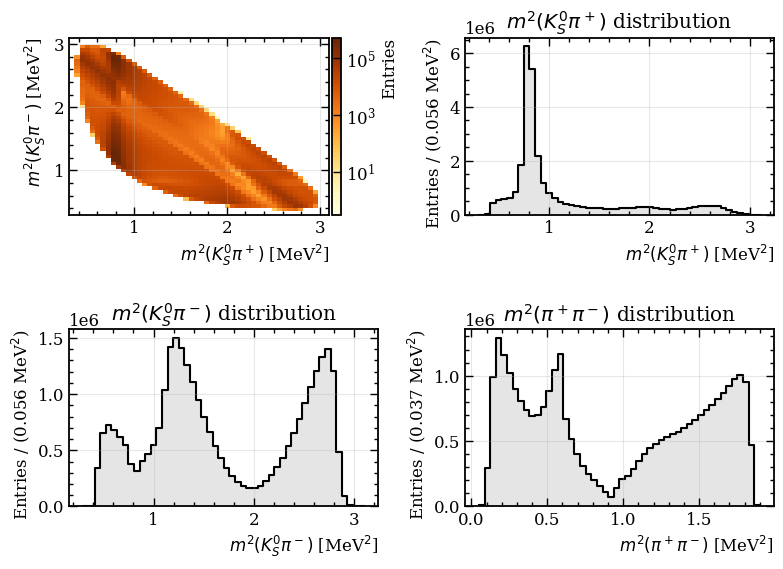

In [22]:
plot_data(data_tf)

## Likelihood

The Negative Log Likelihood

In [23]:
# TF graph for unbinned negalite log likelihood (the quantity to be minimised)
def nll(data, norm):
    data_model = model(data)
    norm_model = model(norm)

    @atfi.function
    def _nll(pars):
        return atfl.unbinned_nll(data_model(**pars), atfl.integral(norm_model(**pars)))

    return _nll

## Samples

The samples to fit

In [24]:
data_tf_small = data_tf[:nfit]
print(data_tf_small)

tf.Tensor(
[[0.85860323 1.16060425]
 [0.81676029 1.45998706]
 [0.77756196 1.77726023]
 ...
 [0.94493034 2.46598145]
 [2.9362943  0.56893689]
 [0.8111311  2.15432205]], shape=(100000, 2), dtype=float64)


and to calculate the integrals

In [25]:
norm_sample = phsp.uniform_sample(nnorm)

print(norm_sample)

tf.Tensor(
[[2.71696439 0.76719436]
 [2.58677747 0.54563095]
 [0.95515866 1.41230562]
 ...
 [1.47943602 2.10539982]
 [1.87902632 1.07117194]
 [1.1608756  1.69160759]], shape=(475200, 2), dtype=float64)


Beware that only approximately 1/2 of the events have been generated in the normalisation sample.

In [26]:
pi180inv = atfi.const(180.0 / atfi.pi())
params = {
    'Kstar892minus': atfi.complex_from_polar(1.590, 131.8/pi180inv),
    'Kstarzero1430minus': atfi.complex_from_polar(2.059, -194.6/pi180inv),
    'Kstartwo1430minus' : atfi.complex_from_polar(1.150, -41.5/pi180inv),
    'Kstar1410minus': atfi.complex_from_polar(0.496, 83.4/pi180inv),
    'Kstar1680minus': atfi.complex_from_polar(1.556, -83.2/pi180inv),
    'Kstar892plus': atfi.complex_from_polar(0.139, -42.1/pi180inv),
    'Kstarzero1430plus': atfi.complex_from_polar(0.176, -102.3/pi180inv),
    'Kstartwo1430plus' : atfi.complex_from_polar(0.077, -32.2/pi180inv),
    'Kstar1410plus': atfi.complex_from_polar(0.248, -145.7/pi180inv),
    'Kstar1680plus': atfi.complex_from_polar(1.407, 86.1/pi180inv),
    'omega': atfi.complex_from_polar(0.0370, 114.9/pi180inv),
    'ftwo1270': atfi.complex_from_polar(1.300, -31.6/pi180inv),
    'rho1450': atfi.complex_from_polar(0.532, 80.8/pi180inv),
    'Kmatrix': atfi.complex_from_polar(1.e-2, 0./pi180inv),
}

In [27]:
def toymc_model(x, switches=fit_switches):#15 * [1]):
    return model(x)(
        switches=switches,
        a1r=atfi.const(1.0),
        a1i=atfi.const(0.0),
        a2r=atfi.real(params['Kstar892minus']),
        a2i=atfi.imaginary(params['Kstar892minus']),
        a3r=atfi.real(params['Kstarzero1430minus']),
        a3i=atfi.imaginary(params['Kstarzero1430minus']),
        a4r=atfi.real(params['Kstartwo1430minus']),
        a4i=atfi.imaginary(params['Kstartwo1430minus']),
        a5r=atfi.real(params['Kstar1410minus']),
        a5i=atfi.imaginary(params['Kstar1410minus']),
        a6r=atfi.real(params['Kstar1680minus']),
        a6i=atfi.imaginary(params['Kstar1680minus']),
        a7r=atfi.real(params['Kstar892plus']),
        a7i=atfi.imaginary(params['Kstar892plus']),
        a8r=atfi.real(params['Kstarzero1430plus']),
        a8i=atfi.imaginary(params['Kstarzero1430plus']),
        a9r=atfi.real(params['Kstartwo1430plus']),
        a9i=atfi.imaginary(params['Kstartwo1430plus']),
        a10r=atfi.real(params['Kstar1410plus']),
        a10i=atfi.imaginary(params['Kstar1410plus']),
        a11r=atfi.real(params['Kstar1680plus']),
        a11i=atfi.imaginary(params['Kstar1680plus']),
        a12r=atfi.real(params['omega']),
        a12i=atfi.imaginary(params['omega']),
        a13r=atfi.real(params['ftwo1270']),
        a13i=atfi.imaginary(params['ftwo1270']),
        a14r=atfi.real(params['rho1450']),
        a14i=atfi.imaginary(params['rho1450']),
        a15r=atfi.real(params['Kmatrix']),
        a15i=atfi.imaginary(params['Kmatrix']),
    )

In [28]:
toy_sample = tft.run_toymc(
    toymc_model, phsp, ntoys, maximum=1.0e-20, chunk=1000000, components=False
)

print(toy_sample)

  Updating maximum: 1e-20 -> 2955.581451482194. Starting over.
  Chunk 1, size=29592, total length=29592
  Chunk 2, size=29654, total length=59246
  Chunk 3, size=29322, total length=88568
  Chunk 4, size=29479, total length=118047
tf.Tensor(
[[0.83549212 1.19216586]
 [0.51879598 2.42866822]
 [0.88316625 1.82875194]
 ...
 [2.55974719 0.4319149 ]
 [1.33387342 2.11442157]
 [0.96554247 0.9979957 ]], shape=(100000, 2), dtype=float64)


(<Figure size 800x600 with 5 Axes>,
 array([[<Axes: xlabel='$m^2(K_S^0\\pi^+)$ [MeV$^2$]', ylabel='$m^2(K_S^0\\pi^-)$ [MeV$^2$]'>,
         <Axes: title={'center': '$m^2(K_S^0\\pi^+)$ distribution'}, xlabel='$m^2(K_S^0\\pi^+)$ [MeV$^2$]', ylabel='Entries / (0.056 MeV$^2$)'>],
        [<Axes: title={'center': '$m^2(K_S^0\\pi^-)$ distribution'}, xlabel='$m^2(K_S^0\\pi^-)$ [MeV$^2$]', ylabel='Entries / (0.056 MeV$^2$)'>,
         <Axes: title={'center': '$m^2(\\pi^+\\pi^-)$ distribution'}, xlabel='$m^2(\\pi^+\\pi^-)$ [MeV$^2$]', ylabel='Entries / (0.037 MeV$^2$)'>]],
       dtype=object))

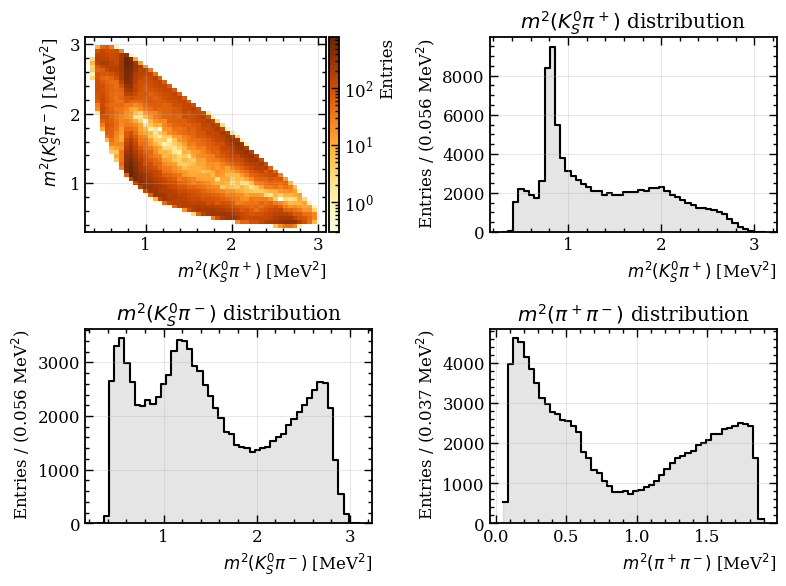

In [29]:
plot_data(toy_sample)

## Fit

We are now ready to run the fit. We define first the fit parameters:

In [30]:
pars = [
    tfo.FitParameter("a1r", 1.0, -100.0, 100.0),
    tfo.FitParameter("a1i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a2r", 1.5, -100.0, 100.0),
    tfo.FitParameter("a2i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a3r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a3i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a4r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a4i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a5r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a5i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a6r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a6i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a7r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a7i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a8r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a8i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a9r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a9i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a10r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a10i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a11r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a11i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a12r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a12i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a13r", 0.0, -100.0, 100.0),
    tfo.FitParameter("a13i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a14r", 2.0, -100.0, 100.0),
    tfo.FitParameter("a14i", 0.0, -100.0, 100.0),
    tfo.FitParameter("a15r", 1.0e-2, -100.0, 100.0),
    tfo.FitParameter("a15i", 0.0, -100.0, 100.0),
]
pars[0].fix()
pars[1].fix()
pars[-1].fix() # use only a real scale factor for the K matrix
#pars[-2].fix()
# for i in range(2, 14):
#     pars[2*i].fix()
#     pars[2*i+1].fix()

and run Minuit

In [31]:
# Run MINUIT minimisation of the neg. log likelihood
result = tfo.run_minuit(nll(data_tf_small, norm_sample), pars)
print(result)
cov = result['covariance']

print(f"{result['time']/result['func_calls']} sec per function call")

fitted_pars = {p: atfi.const(v[0]) for p, v in result["params"].items()}

10 109030.43962199621 [ 1.50000000e+00 -2.28013179e-06  2.00000000e+00  0.00000000e+00
  2.00000000e+00  0.00000000e+00  2.00000000e+00  0.00000000e+00
  2.00000000e+00  0.00000000e+00  2.00000000e+00  0.00000000e+00
  2.00000000e+00  0.00000000e+00  2.00000000e+00  0.00000000e+00
  2.00000000e+00  0.00000000e+00  2.00000000e+00  0.00000000e+00
  2.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.00000000e+00  0.00000000e+00  1.00000000e-02]
20 109030.45707622168 [1.5        0.         2.         0.         1.99999905 0.
 2.         0.         2.         0.         2.         0.
 2.         0.         2.         0.         2.         0.
 2.         0.         2.         0.         0.         0.
 2.         0.         0.01      ]
30 109030.47535496227 [1.5        0.         2.         0.         2.         0.
 1.99999046 0.         2.         0.         2.         0.
 2.         0.         2.         0.         2.         0.
 2.         0.         2.         0.         0

Define a function with the fitted model to calculate fit fractions and projections

In [32]:
def fitted_model(x, switches=fit_switches):
    return model(x)(**fitted_pars, switches=switches)

The fit fractions are calculated

In [33]:
ff = tfo.calculate_fit_fractions(fitted_model, norm_sample)
print(ff)

[0.00017532405154520536, 0.7007572501835039, 0.037992858656901815, 0.0005321844492330067, 0.21963126258812285, 0.36439731611165455, 0.004335237312676656, 0.006439427788014471, 0.020495679794256573, 0.10774401638622497, 0.6506456690137649, 0.016605338630459935, 0.0700696246972287, 0.04450060225989688, 0.014395813667601152, 0.000763070276238864]


## Plotting

For plotting the results we generate a sample according to the model and we overlay it to the data

In [34]:
fitted_sample = tft.run_toymc(
    fitted_model, phsp, int(nnorm/10), maximum=1.0e-20, chunk=100000, components=True
)

  Updating maximum: 1e-20 -> 1341805.1503676255. Starting over.
  Chunk 1, size=1138, total length=1138
  Chunk 2, size=1176, total length=2314
  Chunk 3, size=1154, total length=3468
  Chunk 4, size=1224, total length=4692
  Chunk 5, size=1171, total length=5863
  Chunk 6, size=1175, total length=7038
  Chunk 7, size=1149, total length=8187
  Chunk 8, size=1199, total length=9386
  Chunk 9, size=1136, total length=10522
  Chunk 10, size=1197, total length=11719
  Chunk 11, size=1183, total length=12902
  Chunk 12, size=1124, total length=14026
  Chunk 13, size=1167, total length=15193
  Chunk 14, size=1126, total length=16319
  Chunk 15, size=1153, total length=17472
  Chunk 16, size=1175, total length=18647
  Chunk 17, size=1186, total length=19833
  Chunk 18, size=1139, total length=20972
  Chunk 19, size=1183, total length=22155
  Chunk 20, size=1145, total length=23300
  Chunk 21, size=1103, total length=24403
  Chunk 22, size=1178, total length=25581
  Chunk 23, size=1193, total 

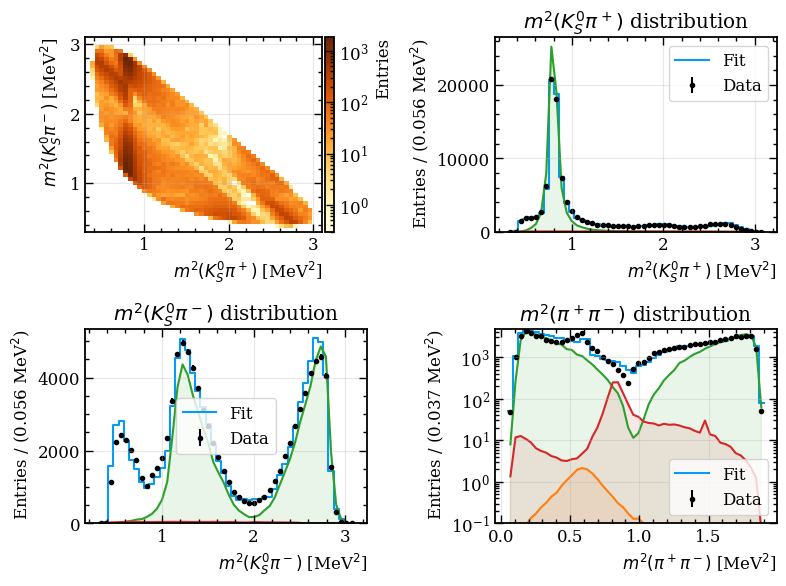

In [35]:
# Plot results
import matplotlib.pyplot as plt

tfp.set_lhcb_style(size=12, usetex=False)  # Adjust plotting style for LHCb papers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # Single subplot on the figure

amps_to_plot = [0,1,14]

# Plot 1D histogram from the toy MC sample
tfp.plot_distr2d(
    data_tf_small[:, 0],
    data_tf_small[:, 1],
    bins=(50, 50),
    ranges=((0.3, 3.1), (0.3, 3.1)),
    fig=fig,
    ax=ax[0, 0],
    labels=(r"$m^2(K_S^0\pi^+)$", r"$m^2(K_S^0\pi^-)$"),
    units=("MeV$^2$", "MeV$^2$"),
    log=True,
)

tfp.plot_distr1d_comparison(
    data_tf_small[:, 0],
    fitted_sample[:, 0],
    cweights=[fitted_sample[:, 2 + i] for i in amps_to_plot],
    bins=50,
    range=(0.3, 3.1),
    ax=ax[0, 1],
    label=r"$m^2(K_S^0\pi^+)$",
    units="MeV$^2$",
)

tfp.plot_distr1d_comparison(
    data_tf_small[:, 1],
    fitted_sample[:, 1],
    cweights=[fitted_sample[:, 2 + i] for i in amps_to_plot],
    bins=50,
    range=(0.3, 3.1),
    ax=ax[1, 0],
    label=r"$m^2(K_S^0\pi^-)$",
    units="MeV$^2$",
)

tfp.plot_distr1d_comparison(
    phsp.m2ac(data_tf_small),
    phsp.m2ac(fitted_sample),
    cweights=[fitted_sample[:, 2 + i] for i in amps_to_plot],
    bins=50,
    range=(0.05, 1.9),
    ax=ax[1, 1],
    label=r"$m^2(\pi^+\pi^-)$",
    units="MeV$^2$",
    log=True,
)

# Show the plot
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

### Status

Problems:
- The K-matrix seems highly suppressed.
- The fit fractions are not correct.
- The LASS distribution let the generation take ages.

In [ ]:
samp = phsp.filter(phsp.unfiltered_sample(1000))

In [ ]:
model(samp)

<function __main__.model.<locals>._model(a1r, a1i, a2r, a2i, a3r, a3i, a4r, a4i, a5r, a5i, a6r, a6i, a7r, a7i, a8r, a8i, a9r, a9i, a10r, a10i, a11r, a11i, a12r, a12i, a13r, a13i, a14r, a14i, a15r, a15i, switches=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>